In [7]:
from dotenv import load_dotenv

load_dotenv()

True

In [8]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model='gpt-4o-mini')

In [1]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]

In [ ]:
def generate(state: AgentState) -> AgentState:
    """
    'generate' Node
    : 사용자의 질문을 받아, 응답을 생성한다.
    """
    
    messages = state['messages']
    ai_message = llm.invoke(messages)
    
    return {'messages': [ai_message]}

In [10]:
from langgraph.graph import StateGraph, START, END

graph_builder = StateGraph(AgentState)

# nodes
graph_builder.add_node('generate', generate)

# edges
graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

In [11]:
graph = graph_builder.compile()

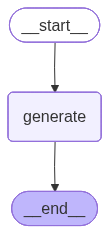

In [12]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
from langchain_core.messages import HumanMessage

query = 'LangGraph를 간단히 설명해주세요.'
initial_state = {'messages': [HumanMessage(query)]}

graph.invoke(initial_state)

{'messages': [AIMessage(content='LangGraph는 자연어 처리(NLP) 분야에서 사용되는 기술로, 언어와 관련된 다양한 정보를 그래프 형태로 표현하는 방법입니다. 이러한 그래프는 단어, 문장, 구문 등의 언어 요소들 간의 관계를 시각적으로 나타내며, 이를 통해 언어의 구조와 의미를 더 잘 이해하고 분석할 수 있도록 도와줍니다.\n\nLangGraph는 다음과 같은 주요 요소들로 구성될 수 있습니다:\n\n1. **노드 (Node)**: 언어의 구성 요소(단어, 문장, 구문 등)를 나타냅니다.\n2. **엣지 (Edge)**: 노드 간의 관계를 표현합니다. 예를 들어, 단어 간의 의미적 관계나 문법적 관계 등을 나타낼 수 있습니다.\n3. **속성 (Property)**: 노드나 엣지에 추가적인 정보를 부여하여 더 깊이 있는 분석이 가능하게 합니다.\n\nLangGraph는 언어 이해, 번역, 정보 검색 등 다양한 응용 분야에서 활용될 수 있으며, 복잡한 언어 데이터를 효과적으로 처리하는 데 유용합니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 238, 'prompt_tokens': 16, 'total_tokens': 254, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bbc38b4db', 'id': 'chatcmpl-C